In [1]:
import sys

print(sys.path)
sys.path.append("/home/momentino/GarbageDetectionAndSegmentation")

['/home/momentino/GarbageDetectionAndSegmentation/notebooks', '/usr/lib64/python310.zip', '/usr/lib64/python3.10', '/usr/lib64/python3.10/lib-dynload', '', '/home/momentino/.local/lib/python3.10/site-packages', '/usr/lib64/python3.10/site-packages', '/usr/lib/python3.10/site-packages']


In [2]:
from imageio import imread
import joblib

import random as rand
import numpy as np 
import cv2
import glob
import time

import matplotlib.pyplot as plt
%matplotlib inline

from utils import convert, show_images
from featuresourcer import FeatureSourcer
from binaryclassifier import BinaryClassifier

In [3]:
svc = joblib.load('svc.pkl')
scaler = joblib.load('scaler.pkl')
classifier = BinaryClassifier(svc, scaler)

sourcer_params = {
  'color_model': 'hls',                # hls, hsv, yuv, ycrcb
  'bounding_box_w': 64,             #
  'bounding_box_h' : 48,
  'number_of_orientations': 12,        # 6 - 12
  'pixels_per_cell': 8,               # 8, 16
  'cells_per_block': 2,                # 1, 2
  'do_transform_sqrt': True
}

new_frame1 = imread("/home/momentino/Scaricati/archive/garbage classification/Garbage classification/cardboard/cardboard173.jpg") #1
new_frame2 = imread("/home/momentino/Scaricati/archive/garbage classification/negative/negative_119_1.jpg") #0
new_frame3 = imread("/home/momentino/Scaricati/archive/garbage classification/Garbage classification/plastic/plastic280.jpg")    #1
new_frame4 = imread("/home/momentino/Scaricati/archive/garbage classification/negative/negative_245_1.jpg")    #0


/tmp/ipykernel_7842/778576954.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  new_frame1 = imread("/home/momentino/Scaricati/archive/garbage classification/Garbage classification/cardboard/cardboard173.jpg") #1
/tmp/ipykernel_7842/778576954.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  new_frame2 = imread("/home/momentino/Scaricati/archive/garbage classification/negative/negative_119_1.jpg") #0
/tmp/ipykernel_7842/778576954.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (

In [4]:
src = FeatureSourcer(sourcer_params, new_frame1)

src.new_frame(new_frame1)
print(classifier.predict(src.slice(0, 0, 64, 64)), end = "")

src.new_frame(new_frame2)
print(classifier.predict(src.slice(0, 0, 64, 64)), end = "")

src.new_frame(new_frame3)
print(classifier.predict(src.slice(0, 0, 64, 64)), end = "")

src.new_frame(new_frame4)
print(classifier.predict(src.slice(0, 0, 64, 64)), end = "")

 PIX TO HOG DI x 0  y  0  h_pix  64  w_pix  64
 x_start  0  x_end  3  y_start  0  Y_end  3
 SLICE SHAPE  (264,)
1 PIX TO HOG DI x 0  y  0  h_pix  64  w_pix  64
 x_start  0  x_end  3  y_start  0  Y_end  3
 SLICE SHAPE  (264,)
0 PIX TO HOG DI x 0  y  0  h_pix  64  w_pix  64
 x_start  0  x_end  3  y_start  0  Y_end  3
 SLICE SHAPE  (264,)
1 PIX TO HOG DI x 0  y  0  h_pix  64  w_pix  64
 x_start  0  x_end  3  y_start  0  Y_end  3
 SLICE SHAPE  (264,)
0

/tmp/ipykernel_7842/1242458489.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  start_frame = imread("/home/momentino/TACO/data/batch_15/000020.jpg")


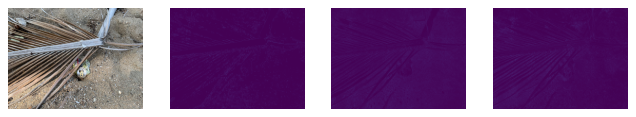

In [5]:
start_frame = imread("/home/momentino/TACO/data/batch_15/000020.jpg")
src.new_frame(start_frame)
rgb_img, a_img, b_img, c_img = src.visualize()
show_images([rgb_img, a_img, b_img, c_img], per_row = 4, per_col = 1, W = 10, H = 2)